In [1]:
from sklearn import datasets
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
digits["images"]

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

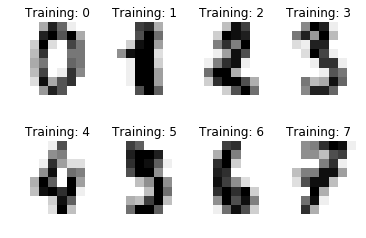

In [9]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.96      0.97        91
          2       0.99      0.99      0.99        86
          3       0.98      0.90      0.94        91
          4       0.99      0.96      0.97        92
          5       0.95      0.96      0.95        91
          6       0.99      0.99      0.99        91
          7       0.98      0.99      0.98        89
          8       0.94      1.00      0.97        88
          9       0.92      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  

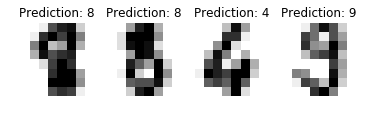

0.96996662958843161

In [36]:
from sklearn import svm
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

Classification report for classifier GaussianNB(priors=None):
             precision    recall  f1-score   support

          0       0.98      0.95      0.97        88
          1       0.81      0.74      0.77        91
          2       0.87      0.84      0.85        86
          3       0.88      0.79      0.83        91
          4       1.00      0.73      0.84        92
          5       0.70      0.81      0.76        91
          6       0.96      0.99      0.97        91
          7       0.65      0.81      0.72        89
          8       0.61      0.76      0.68        88
          9       0.77      0.66      0.71        92

avg / total       0.82      0.81      0.81       899


Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0  2  0  4  0 74  1  3  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0 12  0 72  2  1]
 [ 0  2  5  0  0

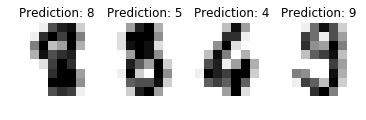

0.80756395995550612

In [35]:
from sklearn.naive_bayes import GaussianNB
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = GaussianNB()
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Classification report for classifier LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        88
          1       0.92      0.89      0.91        91
          2       0.97      0.91      0.94        86
          3       0.90      0.92      0.91        91
          4       0.99      0.90      0.94        92
          5       0.90      0.95      0.92        91
          6       0.95      0.99      0.97        91
          7       0.96      0.92      0.94        89
          8       0.90      0.83      0.86        88
          9       0.79      0.91      0.84        92

avg / total       0.92      0.92      0.92       899


Confusion matrix:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 81  0  0  0  0  1  0  1  8]
 [ 1  0 78  5  0  0  0  0  1  1]
 [ 0  1  1 84  0  1  1  0  3  0]
 [ 1  1  0  0 83  0  0  1  2  4]


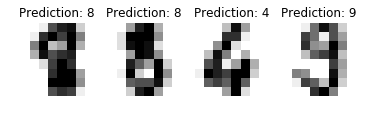

0.92102335928809786

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = LinearDiscriminantAnalysis()
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        88
          1       0.95      0.98      0.96        91
          2       0.98      0.93      0.95        86
          3       0.89      0.90      0.90        91
          4       1.00      0.95      0.97        92
          5       0.96      0.98      0.97        91
          6       0.99      1.00      0.99        91
          7       0.95      1.00      0.97        89
          8       0.95      0.90      0.92        88
          9       0.91      0.92      0.92        92

avg / total       0.96      0.96      0.96       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0 

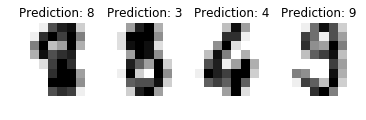

0.95550611790878759

In [37]:
from sklearn.neighbors import KNeighborsClassifier
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

          0       0.92      0.91      0.91        88
          1       0.68      0.57      0.62        91
          2       0.81      0.72      0.76        86
          3       0.68      0.77      0.72        91
          4       0.91      0.77      0.84        92
          5       0.59      0.74      0.65        91
          6       0.88      0.92      0.90        91
          7       0.86      0.80      0.83        89
          8       0.62      0.57      0.59        88
          9       0.63      0.72      0.67        92

avg / total       0.76     

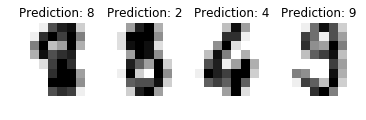

0.74860956618464958

In [40]:
from sklearn.tree import DecisionTreeClassifier
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = DecisionTreeClassifier()
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

          0       0.92      0.90      0.91        88
          1       0.80      0.63      0.70        91
          2       0.91      0.73      0.81        86
          3       0.63      0.74      0.68        91
          4       0.78      0.80      0.79        92
          5       0.57      0.74      0.64        91
          6       0.86      0.92      0.89        91
          7       0.85      0.79      0.82        89
          8       0.65      0.58      0.61        88
          9       0.68      0.71      0.69        92

avg / total       0.76     

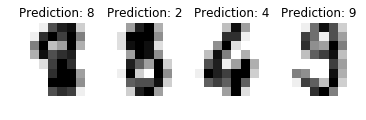

0.75305895439377091

In [41]:
from sklearn.linear_model import LogisticRegression
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = DecisionTreeClassifier()
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
clf.score(data[n_samples // 2:],digits.target[n_samples // 2:])

In [47]:
len(digits.data)

1797